**Model Performance Evaluation of our Sentiment Classification System**

PLStream is a novel, Apache Flink-based, semi-supervised online sentiment classification system that processes massive data streams incrementally, classifies text data (such as Twitter tweets or online product reviews) with or without labels as positive/negative text sentiments & scales linearly with increasing hardware resources.

The "train.csv" dataset contains text data with the actual & predicted text sentiment labels. 

A ground truth value of 1 denotes an actual positive text sentiment whereas a value of 0 denotes an actual negative text sentiment.
A prediction value of 1 denotes a predicted positive text sentiment whereas a value of 0 denotes a predicted negative text sentiment.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')

**Checking for Class Imbalance in Sample Data**

0    176764
1    169236
Name: ground truth, dtype: int64

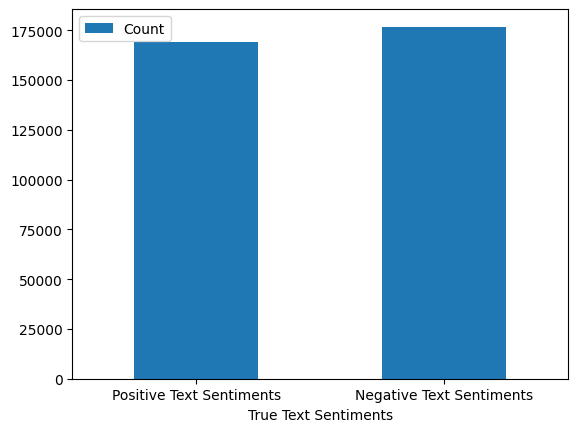

In [3]:
import matplotlib.pyplot as plt

data = {"True Text Sentiments":["Positive Text Sentiments", "Negative Text Sentiments"], "Count":[169236, 176764]}
barplot_df = pd.DataFrame(data)
barplot_df.plot.bar(x = "True Text Sentiments", y = "Count", rot = 360)

df['ground truth'].value_counts()

Since there is only a slight class imbalance in this labelled sample dataset, it should not seriously affect the evaluation of model performance.

Techniques such as Oversampling (most commonly the SMOTE method) or Undersampling can be performed to fix class imbalance in training data.

**Performance Evaluation Metrics for Supervised ML**

**Confusion Matrix:** a commonly-used model performance evaluation metric for binary classifiers.

In [6]:
TP_count = len(df[(df['ground truth'] == 1) & (df['prediction'] == 1)])
print('Count of True Positives: %.0f' % TP_count)

TN_count = len(df[(df['ground truth'] == 0) & (df['prediction'] == 0)])
print('Count of True Negatives: %.0f' % TN_count)

FP_count = len(df[(df['ground truth'] == 0) & (df['prediction'] == 1)])
print('Count of False Positives: %.0f' % FP_count)

FN_count = len(df[(df['ground truth'] == 1) & (df['prediction'] == 0)])
print('Count of False Negatives: %.0f' % FN_count)

Total = TP_count + TN_count + FP_count + FN_count
print('Total Count of Texts (data points): %.0f' % Total)

Count of True Positives: 111612
Count of True Negatives: 151518
Count of False Positives: 25246
Count of False Negatives: 57624
Total Count of Texts (data points): 346000


In [4]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix(df['ground truth'], df['prediction'])

array([[151518,  25246],
       [ 57624, 111612]], dtype=int64)

Confusion Matrix Inferences

**Accuracy:** how often is the classifier correct overall? (TP+TN)/total=TP+TN+FP+FN

A score of 0.7 to 0.9 indicates good model performance.

In [5]:
print("Accuracy:", round((TP_count+TN_count)/Total, 2))

Accuracy: 0.76


**Misclassification Rate/Error Rate:** how often is the classifier wrong overall? 1 - accuracy

In [6]:

print("Error Rate:", round((1 - ((TP_count+TN_count)/Total)), 2))

Error Rate: 0.24


**True Positive Rate/Sensitivity/Recall:** how often does the classifier predict "positive" correctly when the text sentiment is actually "positive"? TP/(TP+FN)

In [7]:
print("Sensitivity:", round((TP_count/(TP_count+FN_count)), 2))

Sensitivity: 0.66


**True Negative Rate/Specificity:** how often does the classifier predict "negative" correctly when the text sentiment is actually "negative"? TN/(FP+TN)

In [8]:
print("Specificity:", round((TN_count/(TN_count+FP_count)), 2))

Specificity: 0.86


In the case of class imbalance, it is better to use **balanced accuracy**.

In [9]:
print("Balanced Accuracy:", (round((TP_count/(TP_count+FN_count)), 2) + round((TN_count/(TN_count+FP_count)), 2))/2)

Balanced Accuracy: 0.76


Since there is *no class imbalance* in our data, *accuracy = balanced accuracy*.

**False Positive Rate:** how often does the classifier predict "positive" wrongly when the text sentiment is actually "negative"? FP/(FP+TN)

In [10]:
print("False Positive Rate:", round((FP_count/(FP_count+TN_count)), 2))

False Positive Rate: 0.14


**False Negative Rate:** how often does the classifier predict "negative" wrongly when the text sentiment is actually "positive"? FN/(FN+TP)

In [11]:
print("False Negative Rate:", round((FN_count/(FN_count+TP_count)), 2))

False Negative Rate: 0.34


**Precision:** It is slightly different from TPR as it denotes the percentage of truly positive text sentiments out of all the positive predicted text sentiments.

In [12]:
print("Precision:", round((TP_count/(TP_count+FP_count)), 2))

Precision: 0.82


**F1-Score:** an alternative classification model performance evaluation metric which is the harmonic mean of precision & recall. It is often a more reliable measure as it takes into account class imbalance. A score of 0.7 or above implies good classification technique.

In [13]:
Precision = round((TP_count/(TP_count+FP_count)), 2)
Recall = round((TP_count/(TP_count+FN_count)), 2)

print("F1-Score:", round((2*Precision*Recall)/(Precision+Recall), 2))

F1-Score: 0.73


**Reference:** Performance Metrics: Confusion matrix, Precision, Recall, and F1 Score (Towards Data Science)

*Link to the article:* https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

**Receiver Operator Characteristic (ROC) Curve:** an another common model performance evaluation metric for binary classifiers, which is a probability curve that plots the TPR against FPR at different classification thresholds. 

**Area Under the Curve (AUC):** a value that measures the model's ability to distinguish between positive & negative text sentiments. An AUC Score of 1 implies 100% correct model predictions.

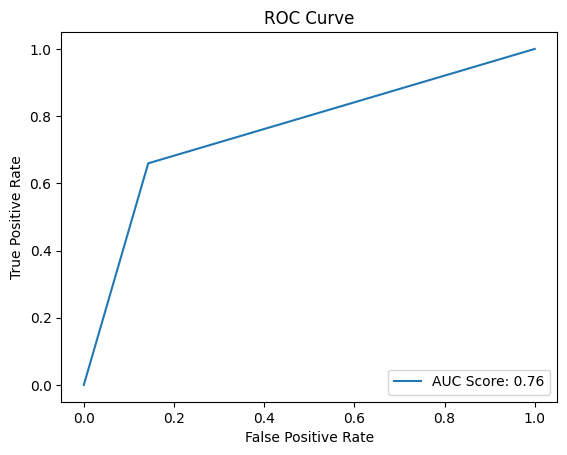

In [14]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(df['ground truth'], df['prediction'])
auc = np.round(metrics.roc_auc_score(df['ground truth'], df['prediction']), 2) # model prediction probabilities must be used instead of df['prediction'] here

plt.plot(fpr,tpr,label="AUC Score: "+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Precision-Recall Curve:** an another common model performance evaluation metric for binary classifiers, which is a probability curve that plots the Precision against Recall at different classification thresholds. It is used instead of the ROC Curve when there is class imbalance in the data.

**PR AUC (Average Precision):** area under the Precision-Recall Curve that also measures the ability of the sentiment classification system to distinguish between positive & negative text sentiments. 

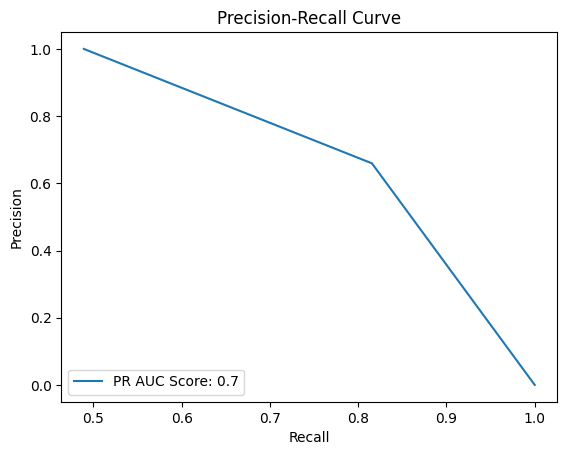

In [15]:
precision, recall, thresholds = metrics.precision_recall_curve(df['ground truth'], df['prediction'])
prauc = np.round(metrics.average_precision_score(df['ground truth'], df['prediction']), 2) # model prediction probabilities must be used instead of df['prediction'] here

plt.plot(precision,recall,label="PR AUC Score: "+str(prauc))
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=3)
plt.show()

**Reference:** ROC Curves and Precision-Recall Curves for Imbalanced Classification (Machine Learning Mastery)

*Link to the article:* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

**Performance Evaluation Metrics for Unsupervised ML**

Since our sentiment classification system also predicts the sentiments of unlabelled text data...

Clustering is an unsupervised ML technique that can be used to "classify" sentences that have the same positive/negative sentiments. When there is high separation between clusters & high cohesion within clusters, the clustering is considered to be good.

Class Imbalance cannot be detected as clustering is done on unlabelled data. However, after the clustering technique is complete, we can check if there is a serious skew in the total number of positive & negative text sentiment predictions.

**Silhouette Coefficient:** the most common way to combine cohesion & separation metrics in a single performance metric. A score of 0.5 & above denotes good clustering technique.

**Calisnki-Harabasz Coefficient:** another clustering performance metric which can be used alongside Silhouette Coefficient is based on the internal dispersion of clusters & the dispersion between clusters. 

Both these performance metrics can be used to evaluate unsupervised model performance and can be performed with the `scikit-learn` Python package.

**Reference:** Evaluation Metrics for Unsupervised Learning Algorithms by Palacio-Niño & Berzal (2019)

*Link to the research paper:* https://arxiv.org/pdf/1905.05667.pdf